In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

Dataset with label

In [3]:
SASS_with_label=pd.read_csv('../../data/data_clean/SASS_cleaned_v2.csv', sep=',', header=0)
print('cleaned_v2:', SASS_with_label.shape)

cleaned_v2: (3640, 57)


In [4]:
cols_ren = {'label_Current_Teacher': 'label_Current',
'vacnc_difficult_STEM_Yes': 'vacnc_STEM',
'number_of_dependents': 'num_dependents',
'region_Northeast': 'region_Northeast',
'region_West': 'region_West',
'marital_status_Married': 'married',
'race_t_White': 'race_T_White',
'race_t_Black': 'race_T_Black',
'race_t_Hispanic': 'race_T_Hispanic',
'gender_t_Female': 'gender_T_Female',
'summer_teaching_Yes': 'summer_teaching',
'nonteaching_job_Yes': 'nonteaching_job',
'nonschool_job_Yes': 'nonschool_job',
'extracur_act_Yes': 'extracur_act',
'merit_pay_Yes': 'merit_pay',
'union_member_Yes': 'union_member',
'BA_major_code_STEM': 'BA_major_STEM',
'MA_major_code_STEM': 'MA_major_STEM',
'main_tch_fields_cert_type_Regular': 'field_cert_Regular',
'MA_deg_Yes': 'deg_T_MA',
'pd_time': 'pd_time',
'pd_finance': 'pd_finance',
'remain_in_teaching': 'remain_teaching',
'STEM_teaching_field': 'field_STEM',
'STEM_hours_taught': 'hrs_taught_STEM',
'public_ft_exp': 'public_ft_exp',
'public_pt_exp': 'public_pt_exp',
'private_ft_exp': 'private_ft_exp',
'class_org': 'class_org',
'main_teaching_lastyr_Same_as_thisyr': 'field_same',
'ft_pt_status_FT': 'full_time',
'teaches_ungraded_Yes': 'teaches_ungraded',
'teaches_7_to_12': 'teaches_7to12',
'new_teacher_Yes': 'new_teacher',
'percent_minority_students': 'minority_students',
'FRPL_eligible_k_12_students': 'FRPL_eligible_k12',
'student_teacher_ratio': 'stu_tch_ratio',
'sch_type': 'sch_type',
'level_Elementary': 'level_Elementary',
'urbanicity': 'urbanicity',
'title_I_receive_students_Yes': 'title_I_receive',
'age_p': 'age_P',
'salary': 'salary_P',
'yrs_princpl_this_sch': 'yrs_P_this_sch',
'yrs_princpl_oth_schls': 'yrs_P_oth_schls',
'yrs_tchng_before_princpl': 'yrs_tch_before_P',
'yrs_tchng_since_princpl': 'yrs_tch_since_P',
'deg_highest_P': 'deg_highest_P',
'race_p_Black': 'race_P_Black',
'race_p_White': 'race_P_White',
'race_p_Hispanic': 'race_P_Hispanic',
'gender_p_Female': 'gender_P_Female',
'incentives_pay': 'incen_pay',
'incentives_recruit_NonSTEM': 'incen_NonSTEM'}
 
SASS_with_label.rename(columns=cols_ren, inplace=True)

In [5]:
label = ['label_Current']
cols_drop = ['CNTLNUM_T', 'SCHCNTL', 'CNTLNUM_P']
cols_na = ['married', 'num_dependents']

y=SASS_with_label[label].values.ravel()
columns = SASS_with_label.drop(columns=label + cols_drop + cols_na).columns.tolist()
X_label = SASS_with_label[columns].copy()

print('Labeled train set shape: {}'.format(X_label.shape))

Labeled train set shape: (3640, 51)


In [6]:
categorical_cols= ['vacnc_STEM',
            'region_Northeast',
            'region_West',
            'race_T_White',
            'race_T_Black',
            'race_T_Hispanic',
            'gender_T_Female',
            'summer_teaching',
            'nonteaching_job',
            'nonschool_job',
            'extracur_act',
            'merit_pay',
            'union_member',
            'BA_major_STEM',
            'MA_major_STEM',
            'field_cert_Regular',
            'deg_T_MA',
            'pd_time',
            'pd_finance',
            'remain_teaching',
            'field_STEM',
            'field_same',
            'full_time',
            'teaches_7to12',
            'new_teacher',
            'sch_type',
            'level_Elementary',
            'urbanicity',
            'title_I_receive',
            'deg_highest_P',
            'race_P_Black',
            'race_P_White',
            'race_P_Hispanic',
            'gender_P_Female',
            'incen_pay',
            'incen_NonSTEM',
            'class_org',
            'teaches_ungraded']
numerical_cols = [c for c in columns if c not in categorical_cols]
categorical_cols_idx = [columns.index(c) for c in categorical_cols if c in columns]

dtype = {c: 'int' for c in categorical_cols}
X_label=X_label.astype(dtype)

Dataset with no label

In [7]:
SASS_no_label=pd.read_csv('../../data/data_clean/SASS_no_label_v2.csv', sep=',', header=0)
print('no_label_v2:',SASS_no_label.shape)

X_all=SASS_no_label[columns].copy()
X_all=X_all.astype(dtype)
print('Labeled train set shape: {}'.format(X_all.shape))

no_label_v2: (33198, 54)
Labeled train set shape: (33198, 51)


**Normalization**

In [8]:
scaler = StandardScaler()
scaler.fit(X_label[numerical_cols])
X_label[numerical_cols] = scaler.transform(X_label[numerical_cols])
X_all[numerical_cols] = scaler.transform(X_all[numerical_cols])

In [9]:
#plotting confusion matrix
def ticks(x, position):
    if position == 1: return 'Former'
    elif position == 2: return 'Current'
    else: return x

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as mticker

### Teacher retention prediction on  unlabaled data with Best Grandient Boosting Model ###

Training - no hyperparameter tuning

In [11]:
X_label=X_label.astype({columns[c]: 'category' for c in categorical_cols_idx})
X_all=X_all.astype({columns[c]: 'category' for c in categorical_cols_idx})

In [12]:
%%time
import xgboost

estimator = xgboost.XGBClassifier(seed=123, objective="binary:logistic", eval_metric="logloss", use_label_encoder=False,
                                  tree_method="hist", enable_categorical=True, max_cat_to_onehot=4)

estimator.fit(X_label, y)
estimator.save_model("categorical-model.json")
print('Train Accuracy: {:0.4f}'.format(estimator.score(X_label, y)))

Train Accuracy: 0.9967
CPU times: user 1.64 s, sys: 532 ms, total: 2.17 s
Wall time: 670 ms


Training - with the best hyperparameters selected from [Modeling_GB.ipynb](Modeling_GB.ipynb)

In [13]:
%%time
import xgboost

params = {'n_estimators': 200, 'min_child_weight': 0, 'max_depth': 6, 'learning_rate': 0.2, 'lambda': 10, 'gamma': 0.1, 'alpha': 10}

estimator = xgboost.XGBClassifier(seed=123, objective="binary:logistic", eval_metric="logloss", use_label_encoder=False,
                                  tree_method="hist", enable_categorical=True, max_cat_to_onehot=4)

estimator.set_params(**params)
estimator.fit(X_label, y)
estimator.save_model("categorical-model.json")

y_pred = estimator.predict(X_label)

print('Train Accuracy: {:0.4f}'.format(estimator.score(X_label, y)))

Train Accuracy: 0.7915
CPU times: user 1.67 s, sys: 441 ms, total: 2.11 s
Wall time: 626 ms


Finding the best threshold incorpoating US Teacher attrition rate (10%)

In [14]:
for th in np.arange(0.2,0.3,0.01):
    pred_prob_all=estimator.predict_proba(X_all)
    pred_all=pred_prob_all[:, 1] > th
    pred_count_all=np.unique(pred_all, return_counts=True)
    attr_rate = pred_count_all[1][0]/pred_count_all[1].sum()*100
    print('Attrition rate for threshold {:0.2f} {:0.2f}%:'.format(th, attr_rate))
    
    if attr_rate > 10: 
        best_th=th
        print('Best threshold for the teacher attrition rate 10%: {:0.02f}'.format(best_th))
        break

Attrition rate for threshold 0.20 5.66%:
Attrition rate for threshold 0.21 6.25%:
Attrition rate for threshold 0.22 6.83%:
Attrition rate for threshold 0.23 7.49%:
Attrition rate for threshold 0.24 8.16%:
Attrition rate for threshold 0.25 8.81%:
Attrition rate for threshold 0.26 9.51%:
Attrition rate for threshold 0.27 10.24%:
Best threshold for the teacher attrition rate 10%: 0.27


Unlabeled data (33198, 49)

In [15]:
print('Assigning label 1 or True for Current Teachers depends on probability')

print('With threshold 5:5 :', np.unique(estimator.predict(X_all), return_counts=True))

pred_prob_all=estimator.predict_proba(X_all)
pred_all=pred_prob_all[:, 1] > best_th
pred_count_all=np.unique(pred_all, return_counts=True)
print('With threshold 1:9 :',pred_count_all)

Assigning label 1 or True for Current Teachers depends on probability
With threshold 5:5 : (array([0, 1]), array([12169, 21029]))
With threshold 1:9 : (array([False,  True]), array([ 3399, 29799]))


Creating dataframes with predicted labels

In [16]:
df_all=pd.DataFrame(SASS_no_label, columns=['SCHCNTL', 'CNTLNUM_T', 'CNTLNUM_P']+columns)
df_all['label_Current']=pred_all
df_all['label_Current']=df_all['label_Current'].apply(lambda x: 1 if x==True else 0)
print(df_all.shape)
print('Total number of schools: ',df_all.SCHCNTL.nunique())
print('Average number of teachers per school: {:0.2f}'
      .format(df_all.shape[0]/df_all.SCHCNTL.nunique()))

(33198, 55)
Total number of schools:  7428
Average number of teachers per school: 4.47


In [17]:
teacher_per_school=df_all.groupby(['SCHCNTL'], as_index=False).agg({'CNTLNUM_T': 'count', 'label_Current': 'sum'})
teacher_per_school.rename(columns={'label_Current': 'Current_Teacher'}, inplace=True)
teacher_per_school['Former_Teacher']=teacher_per_school.apply(lambda x: x.CNTLNUM_T-x.Current_Teacher, axis=1)
teacher_per_school.rename(columns={'CNTLNUM_T': 'Teachers Per School'}).describe()

,SCHCNTL,Teachers Per School,Current_Teacher,Former_Teacher
count,7428.000000,7428.000000,7428.000000,7428.000000
mean,106149.018848,4.469305,4.011712,0.457593
std,3551.278379,2.566997,2.322346,0.801880
min,100001.000000,1.000000,0.000000,0.000000
25%,103086.750000,3.000000,2.000000,0.000000
50%,106087.500000,4.000000,4.000000,0.000000
75%,109234.500000,6.000000,5.000000,1.000000
max,112324.000000,18.000000,18.000000,8.000000


In [18]:
teacher_per_school2=teacher_per_school.groupby(['CNTLNUM_T'], as_index=False).agg({'SCHCNTL': 'count', 'Current_Teacher': 'sum', 'Former_Teacher': 'sum'})
num_teachers=pd.DataFrame(teacher_per_school2[['Current_Teacher','Former_Teacher']].stack(), columns=['Num_Teachers'])#, index=range(teacher_per_school2.shape[0]*2))
teacher_per_school2.rename(columns={'CNTLNUM_T': 'Teachers Per School', 'SCHCNTL': 'Num_Schools'})

,Teachers Per School,Num_Schools,Current_Teacher,Former_Teacher
0,1,602,563,39
1,2,1123,2109,137
2,3,1400,3924,276
3,4,1220,4484,396
4,5,958,4245,545
5,6,732,3868,524
6,7,477,2924,415
7,8,333,2338,326
8,9,225,1795,230
9,10,139,1204,186


In [19]:
num=9
teacher_per_school3=teacher_per_school2.copy()
teacher_per_school3=teacher_per_school3.append({'CNTLNUM_T': str(num+1)+' or more',
                                                'SCHCNTL': teacher_per_school2[teacher_per_school2['CNTLNUM_T'] > num].SCHCNTL.sum(),
                                                'Current_Teacher': teacher_per_school2[teacher_per_school2['CNTLNUM_T'] > num].Current_Teacher.sum(),
                                                'Former_Teacher': teacher_per_school2[teacher_per_school2['CNTLNUM_T'] > num].Former_Teacher.sum()},
                                                ignore_index=True)
teacher_per_school3.drop(teacher_per_school2[teacher_per_school2['CNTLNUM_T'] > num].index,
                         inplace=True)
teacher_per_school3

/var/folders/r0/cx28jby50vv14k5xp2yrpdkm0000gn/T/ipykernel_16457/2287352482.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teacher_per_school3=teacher_per_school3.append({'CNTLNUM_T': str(num+1)+' or more',


,CNTLNUM_T,SCHCNTL,Current_Teacher,Former_Teacher
0,1,602,563,39
1,2,1123,2109,137
2,3,1400,3924,276
3,4,1220,4484,396
4,5,958,4245,545
5,6,732,3868,524
6,7,477,2924,415
7,8,333,2338,326
8,9,225,1795,230
18,10 or more,358,3549,511


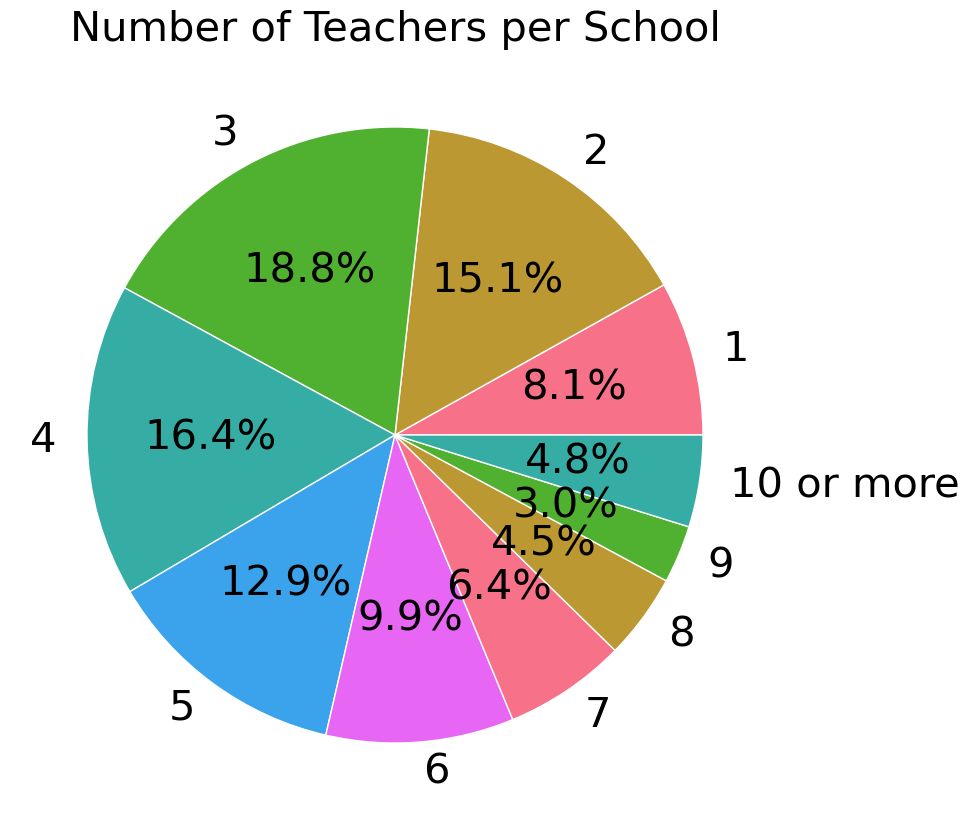

In [20]:
plt.figure(figsize=(10,10))

size=1
colors=sns.color_palette('husl')[:teacher_per_school.CNTLNUM_T.value_counts().index.nunique()]
plt.pie(teacher_per_school3.SCHCNTL, labels=teacher_per_school3.CNTLNUM_T, colors=colors, 
        radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'),
       textprops={'fontsize': 30})
# colors=sns.color_palette('deep')[0:2]
# plt.pie(num_teachers.Num_Teachers, labels=num_teachers.index.to_frame()[1].values, colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Number of Teachers per School', size=30)
plt.show()

Aggregating the dataframe per school

In [21]:
agg={'label_Current': 'sum', 'CNTLNUM_T': 'count', 'CNTLNUM_P': 'nunique', 'vacnc_STEM': 'max', 'region_Northeast': 'max', 'region_West': 'max', 'race_T_White': 'mean', 'race_T_Black': 'mean', 'race_T_Hispanic': 'mean', 'gender_T_Female': 'mean', 'summer_teaching': 'mean', 'nonteaching_job': 'mean', 'nonschool_job': 'mean', 'extracur_act': 'mean', 'merit_pay': 'mean', 'union_member': 'mean', 'BA_major_STEM': 'mean', 'MA_major_STEM': 'mean', 'field_cert_Regular': 'mean', 'deg_T_MA': 'mean', 'pd_time': 'mean', 'pd_finance': 'mean', 'remain_teaching': 'mean', 'field_STEM': 'mean', 'hrs_taught_STEM': 'mean', 'public_ft_exp': 'mean', 'public_pt_exp': 'mean', 'private_ft_exp': 'mean', 'field_same': 'mean', 'full_time': 'mean', 'teaches_7to12': 'mean', 'new_teacher': 'mean', 'minority_students': 'max', 'FRPL_eligible_k12': 'max', 'stu_tch_ratio': 'mean', 'sch_type': 'max', 'level_Elementary': 'max', 'urbanicity': 'max', 'title_I_receive': 'max', 'age_P': 'max', 'salary_P': 'max', 'yrs_P_this_sch': 'max', 'yrs_P_oth_schls': 'max', 'yrs_tch_before_P': 'max', 'yrs_tch_since_P': 'max', 'deg_highest_P': 'max', 'race_P_Black': 'max', 'race_P_White': 'max', 'race_P_Hispanic': 'max', 'gender_P_Female': 'max', 'incen_pay': 'max', 'incen_NonSTEM': 'max'}


In [22]:
df_sch=df_all.groupby(['SCHCNTL'], as_index=False).agg(agg)
df_sch.rename(columns={'CNTLNUM_T': 'NUM_T', 'CNTLNUM_P': 'NUM_P',
                      'label_Current': 'NUM_T_Pred'}, inplace=True)
print(df_sch.shape)

print('Number of schools', df_sch.SCHCNTL.nunique())
print('Number of teachers', df_sch.NUM_T.sum())
print('Number of principals', df_sch.NUM_P.sum())

(7428, 53)
Number of schools 7428
Number of teachers 33198
Number of principals 7428


### Analysis ###

**Public Schools**

In [23]:
col='vacnc_STEM'
count=1
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'STEM' if x==1 else 'Non-STEM')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (1): vacnc_STEM


,vacnc_STEM,NUM_T_Pred,label,total,ratio
0,Non-STEM,21705,Current,24090,90.099626
1,Non-STEM,2385,Former,24090,9.900374
2,STEM,8094,Current,9108,88.866930
3,STEM,1014,Former,9108,11.133070


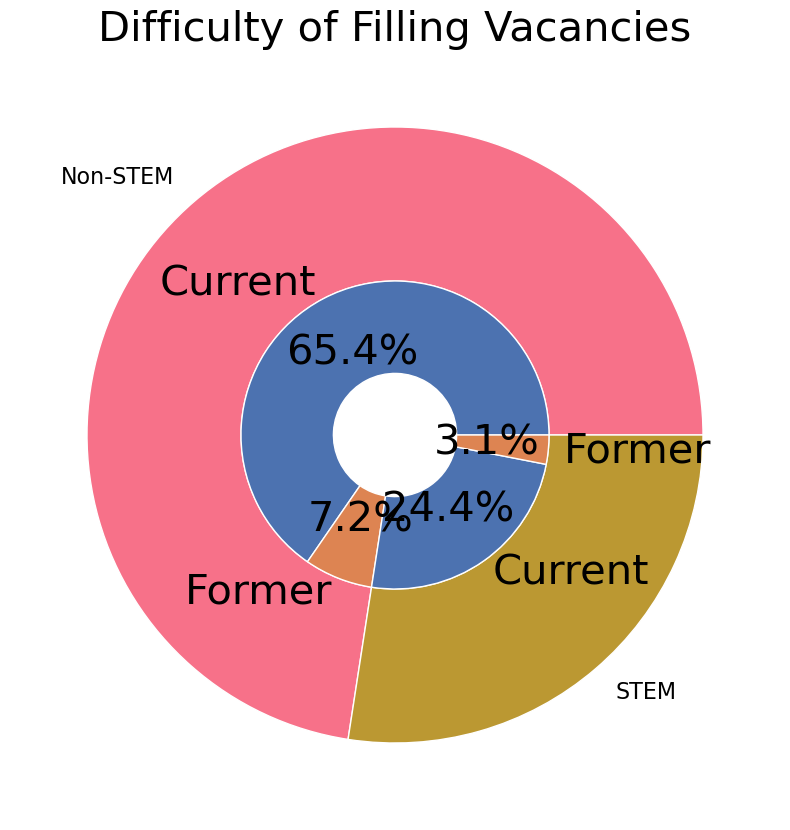

In [24]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Difficulty of Filling Vacancies', size=30)

plt.show()

In [25]:
col='region_West'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'West' if x==1 else 'Other Regions')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (2): region_West


,region_West,NUM_T_Pred,label,total,ratio
0,Other Regions,22128,Current,24726,89.492842
1,Other Regions,2598,Former,24726,10.507158
2,West,7671,Current,8472,90.545326
3,West,801,Former,8472,9.454674


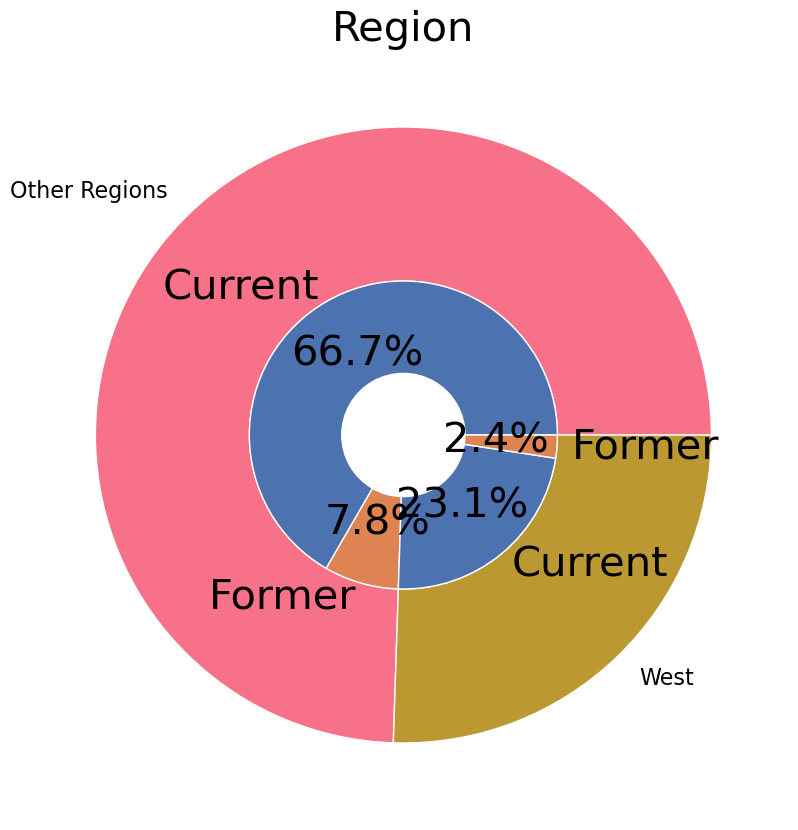

In [26]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Region', size=30)

plt.show()

In [53]:
col='level_Elementary'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Elementary' if x==1 else 'Secondary/Combined')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (15): level_Elementary


,level_Elementary,NUM_T_Pred,label,total,ratio
0,Elementary,11127,Current,11655,95.469755
1,Elementary,528,Former,11655,4.530245
2,Secondary/Combined,18672,Current,21543,86.673165
3,Secondary/Combined,2871,Former,21543,13.326835


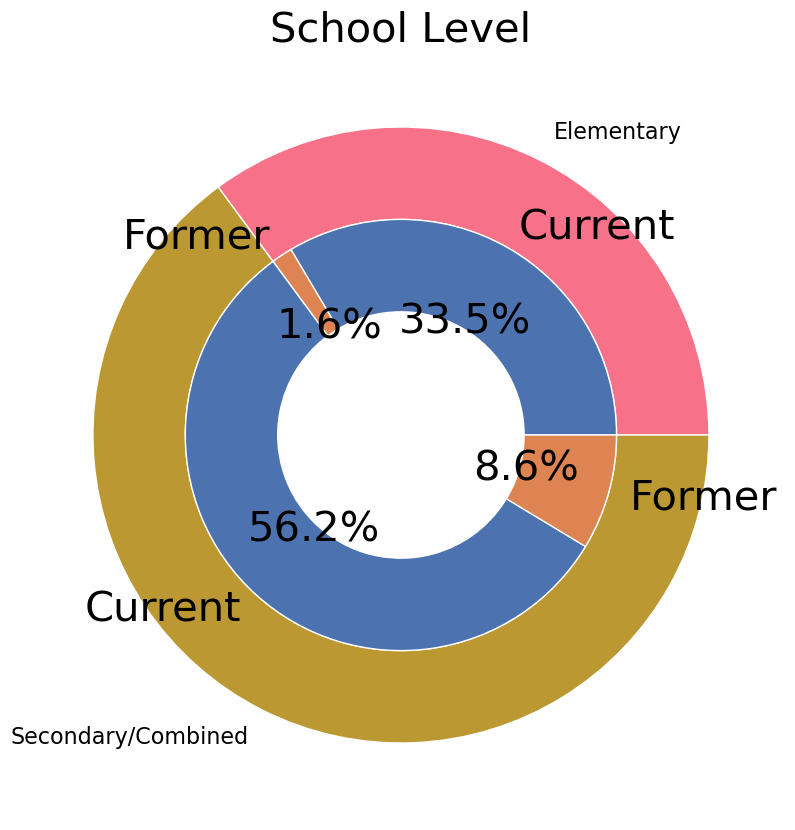

In [57]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('School Level', size=30)

plt.show()

In [29]:
col='incen_pay'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Yes' if x==1 else 'No')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (4): incen_pay


,incen_pay,NUM_T_Pred,label,total,ratio
0,No,25154,Current,28054,89.662793
1,No,2900,Former,28054,10.337207
2,Yes,4645,Current,5144,90.299378
3,Yes,499,Former,5144,9.700622


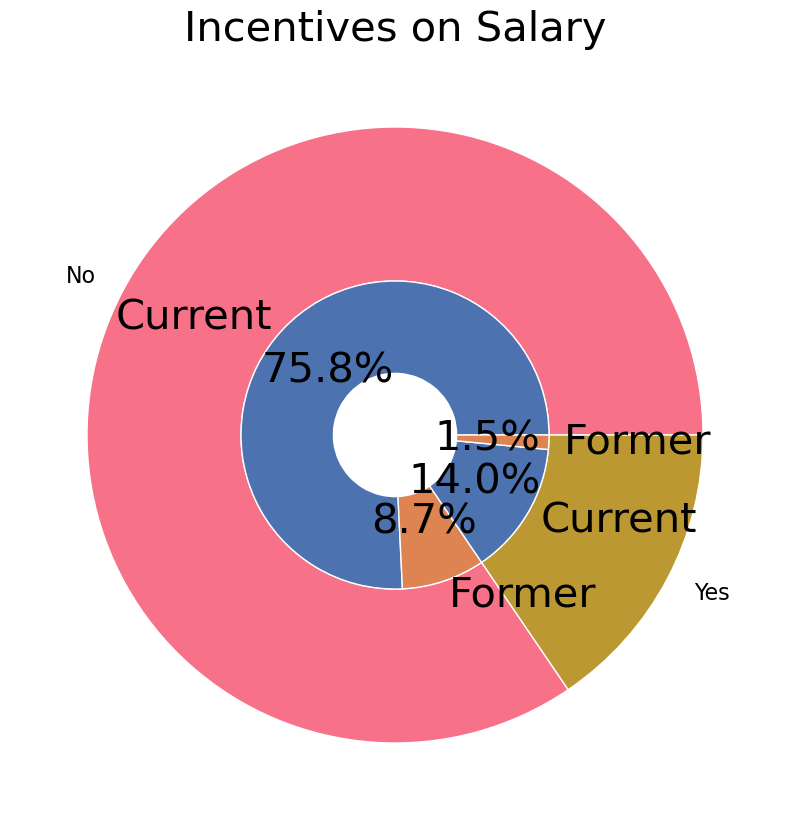

In [30]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Incentives on Salary', size=30)

plt.show()

In [31]:
col='incen_NonSTEM'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Non-STEM' if x==1 else 'No')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (5): incen_NonSTEM


,incen_NonSTEM,NUM_T_Pred,label,total,ratio
0,No,27131,Current,30297,89.550120
1,No,3166,Former,30297,10.449880
2,Non-STEM,2668,Current,2901,91.968287
3,Non-STEM,233,Former,2901,8.031713


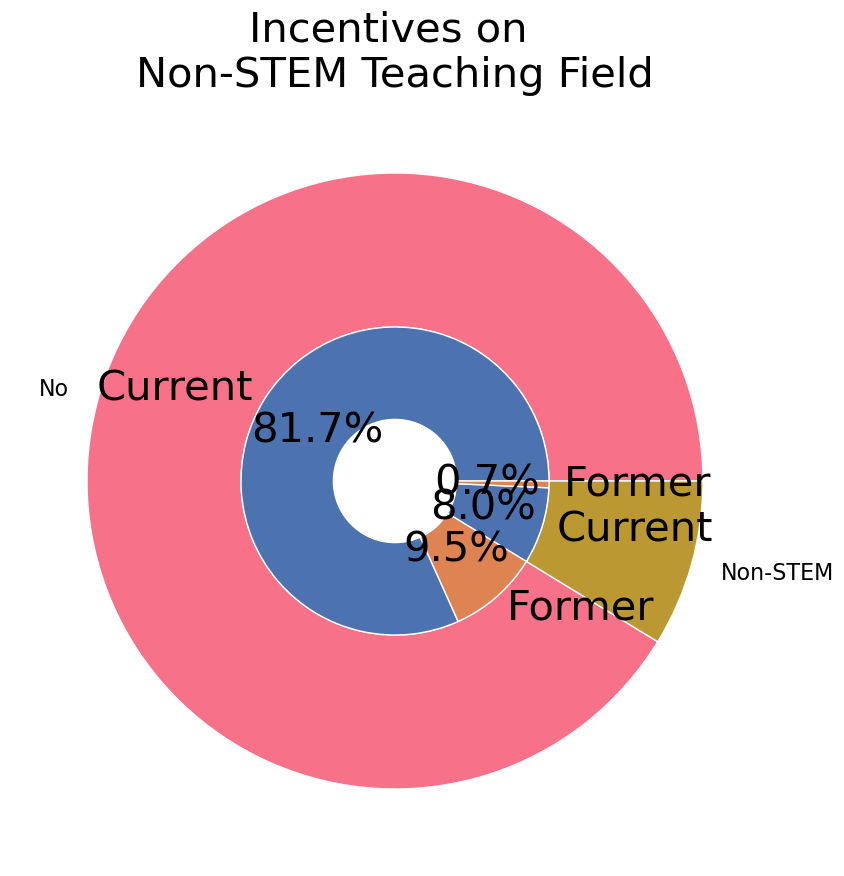

In [32]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Incentives on \nNon-STEM Teaching Field', size=30)

plt.show()

In [59]:
category={1: 'Large/mid size\ncentral city', 2: 'Urban fringe of \nlarge/mid-size city', 3: 'Small town/Rural'}

col='urbanicity'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].map(category)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (16): urbanicity


,urbanicity,NUM_T_Pred,label,total,ratio
0,Large/mid size\ncentral city,6616,Current,7301,90.617724
1,Large/mid size\ncentral city,685,Former,7301,9.382276
2,Small town/Rural,11368,Current,12930,87.919567
3,Small town/Rural,1562,Former,12930,12.080433
4,Urban fringe of \nlarge/mid-size city,11815,Current,12967,91.115910
5,Urban fringe of \nlarge/mid-size city,1152,Former,12967,8.884090


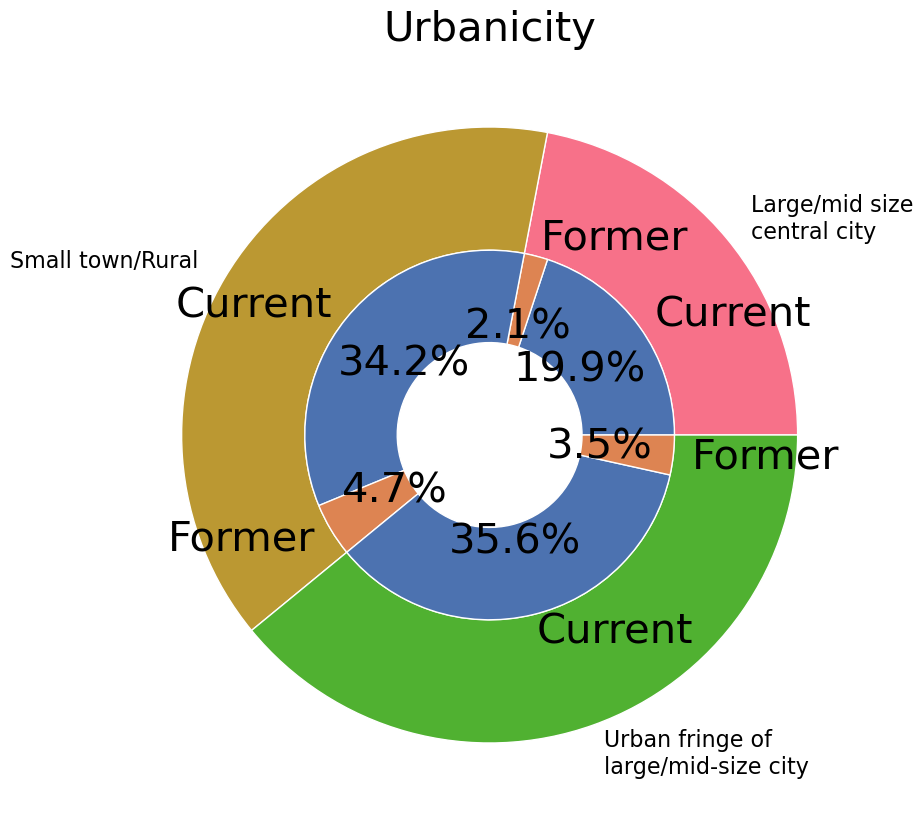

In [60]:
plt.figure(figsize=(10,10))
size=0.4

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Urbanicity', size=30)

plt.show()

In [35]:
col='title_I_receive'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']

table[col]=table[col].apply(lambda x: 'Yes' if x==1 else 'No')
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (7): title_I_receive


,title_I_receive,NUM_T_Pred,label,total,ratio
0,No,17209,Current,19449,88.482698
1,No,2240,Former,19449,11.517302
2,Yes,12590,Current,13749,91.570296
3,Yes,1159,Former,13749,8.429704


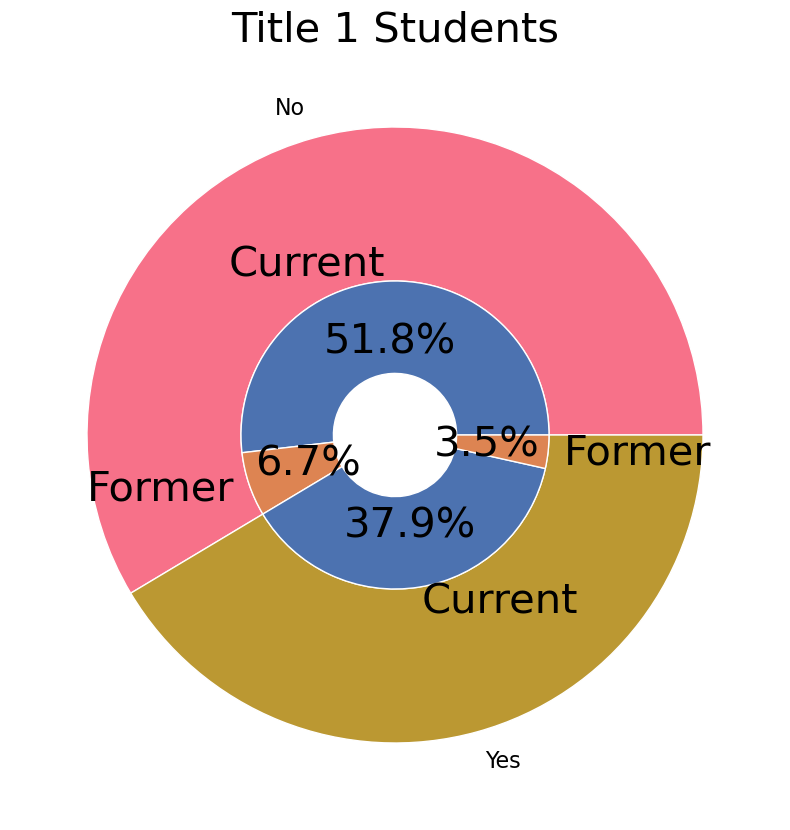

In [36]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Title 1 Students', size=30)

plt.show()

**Public Principal**

In [37]:
category={1: '< 40', 2: '40-44', 3: '45-49', 4: '50-54', 5: '>= 55'}

col='age_P'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].map(category)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (8): age_P


,age_P,NUM_T_Pred,label,total,ratio
0,40-44,3541.0,Current,3961.0,89.396617
1,40-44,420.0,Former,3961.0,10.603383
2,45-49,7170.0,Current,7980.0,89.849624
3,45-49,810.0,Former,7980.0,10.150376
4,50-54,9841.0,Current,10962.0,89.773764
5,50-54,1121.0,Former,10962.0,10.226236
6,< 40,2985.0,Current,3242.0,92.072795
7,< 40,257.0,Former,3242.0,7.927205
8,>= 55,6262.0,Current,7053.0,88.784914
9,>= 55,791.0,Former,7053.0,11.215086


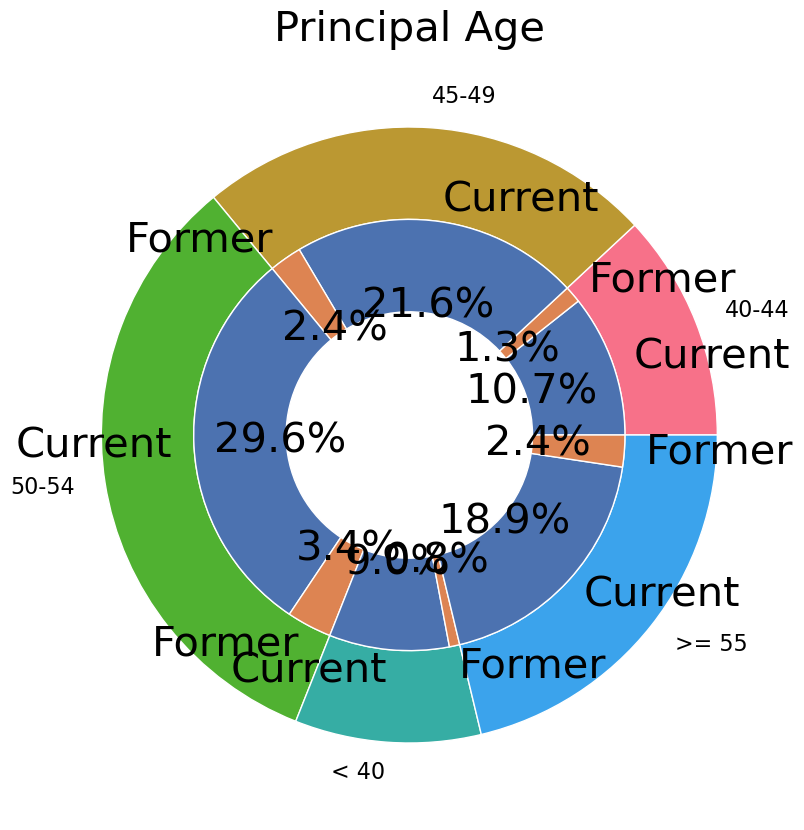

In [38]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Age', size=30)

plt.show()

In [39]:
category={1: 'Less than $49,000', 2: '\$49,000-$59,999', 3: '\$60,000-$69,999', 4: '\$70,000-$79,999', 5: '\$80,000-$89,999', 6: '\$90,000 or more'}

col='salary_P'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].map(category)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (9): salary_P


,salary_P,NUM_T_Pred,label,total,ratio
0,"Less than $49,000",3005.0,Current,3340.0,89.970060
1,"Less than $49,000",335.0,Former,3340.0,10.029940
2,"\$49,000-$59,999",6728.0,Current,7583.0,88.724779
3,"\$49,000-$59,999",855.0,Former,7583.0,11.275221
4,"\$60,000-$69,999",8021.0,Current,8962.0,89.500112
5,"\$60,000-$69,999",941.0,Former,8962.0,10.499888
6,"\$70,000-$79,999",6132.0,Current,6777.0,90.482514
7,"\$70,000-$79,999",645.0,Former,6777.0,9.517486
8,"\$80,000-$89,999",3655.0,Current,4038.0,90.515106
9,"\$80,000-$89,999",383.0,Former,4038.0,9.484894


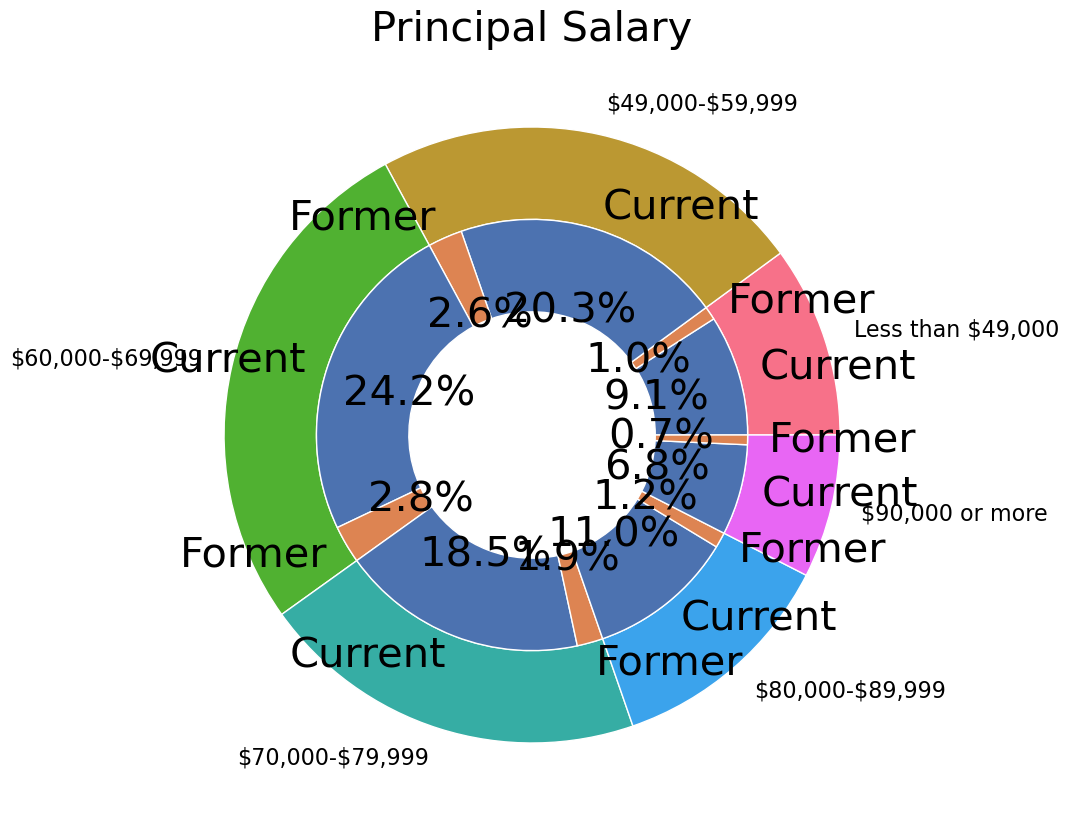

In [40]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Salary', size=30)

plt.show()

In [41]:
category={1: 'Associate', 2: 'Bachelors', 3: 'Masters', 
          4: 'Education\nSpecialist', 5: 'Doctorate'}

col='deg_highest_P'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].map(category)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (10): deg_highest_P


,deg_highest_P,NUM_T_Pred,label,total,ratio
0,Associate,7.0,Current,9.0,77.777778
1,Associate,2.0,Former,9.0,22.222222
2,Bachelors,380.0,Current,415.0,91.566265
3,Bachelors,35.0,Former,415.0,8.433735
4,Doctorate,3279.0,Current,3637.0,90.156723
5,Doctorate,358.0,Former,3637.0,9.843277
6,Education\nSpecialist,9900.0,Current,11126.0,88.980766
7,Education\nSpecialist,1226.0,Former,11126.0,11.019234
8,Masters,16233.0,Current,18011.0,90.128255
9,Masters,1778.0,Former,18011.0,9.871745


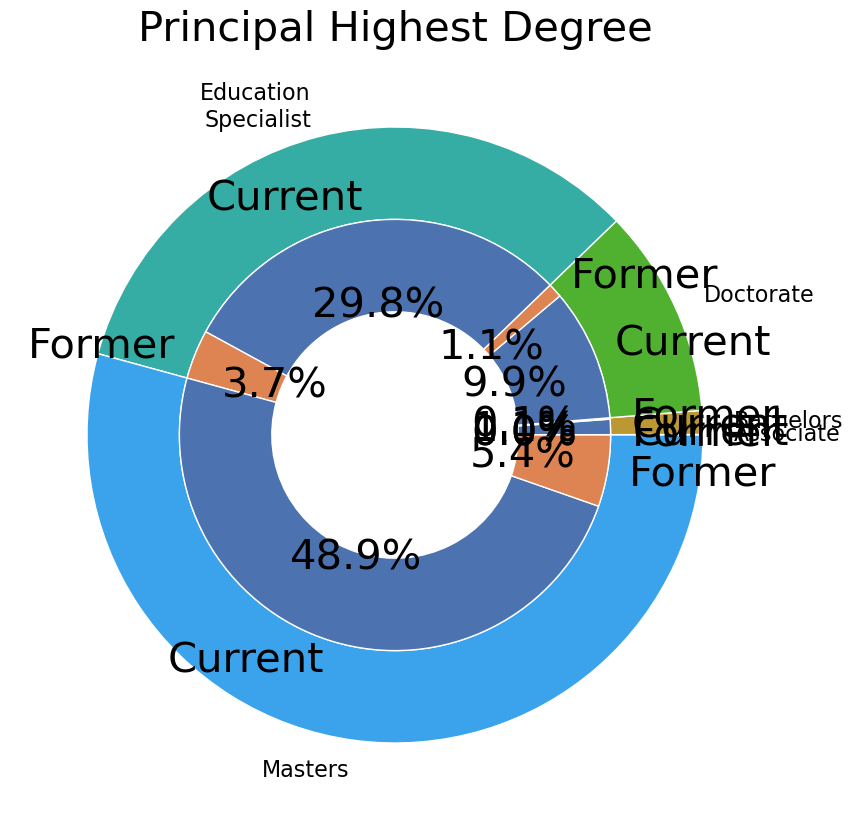

In [42]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Highest Degree', size=30)

plt.show()

In [43]:
col='race_P_Black'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Black' if x==1 else 'Non-Black')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (11): race_P_Black


,race_P_Black,NUM_T_Pred,label,total,ratio
0,Black,2552,Current,2815,90.657194
1,Black,263,Former,2815,9.342806
2,Non-Black,27247,Current,30383,89.678439
3,Non-Black,3136,Former,30383,10.321561


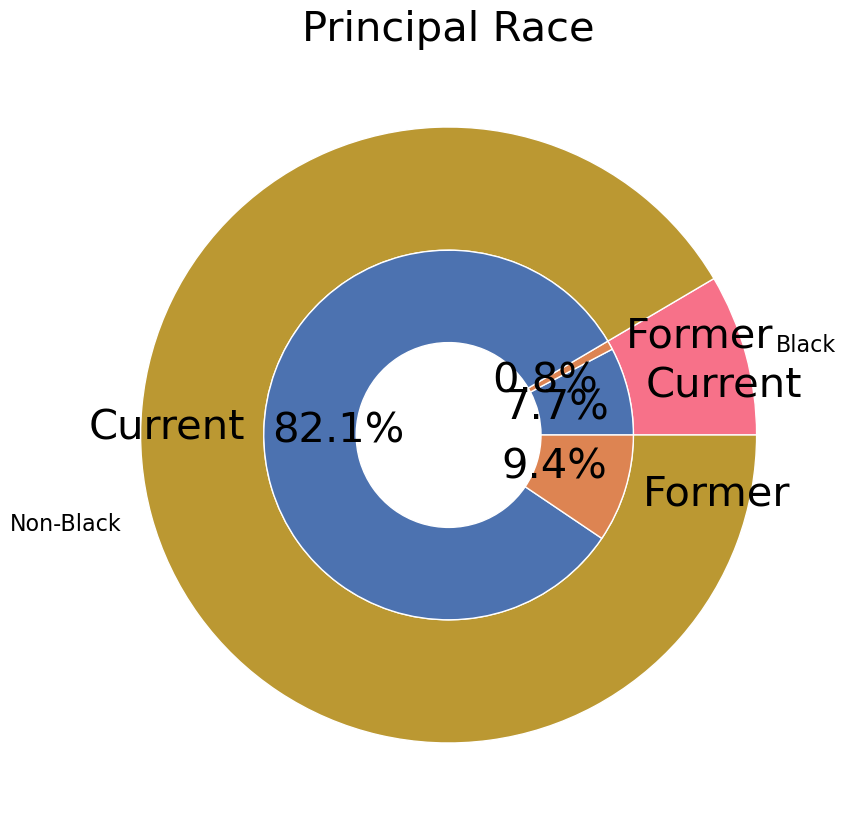

In [44]:
plt.figure(figsize=(10,10))
size=0.4

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Race', size=30)

plt.show()

In [45]:
col='race_P_White'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'White' if x==1 else 'Non-White')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (12): race_P_White


,race_P_White,NUM_T_Pred,label,total,ratio
0,Non-White,4770,Current,5188,91.942945
1,Non-White,418,Former,5188,8.057055
2,White,25029,Current,28010,89.357372
3,White,2981,Former,28010,10.642628


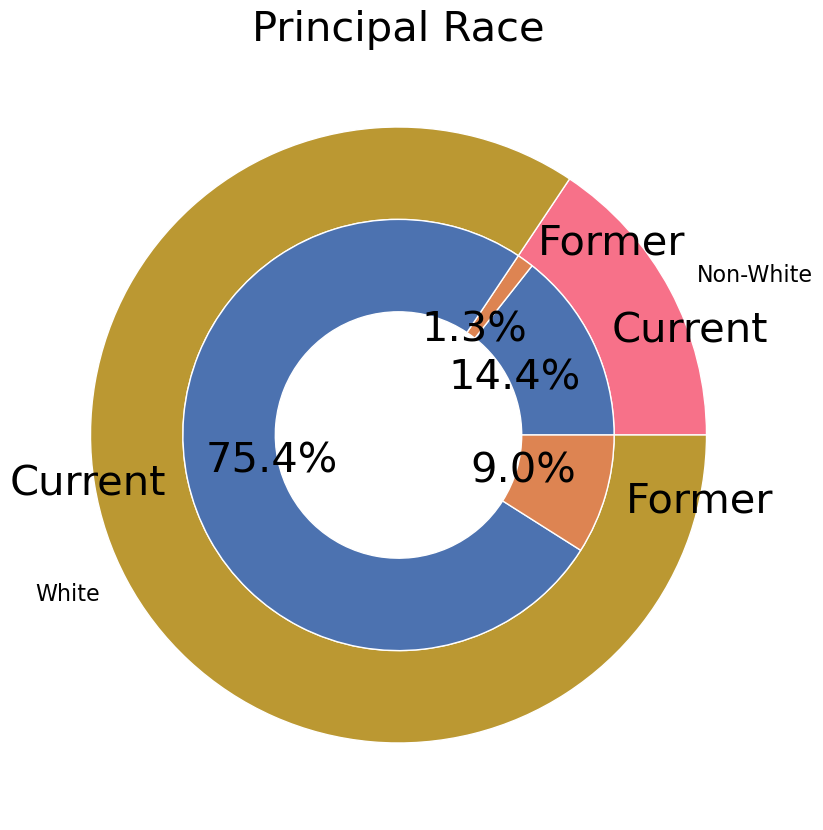

In [46]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Race', size=30)

plt.show()

In [47]:
col='race_P_Hispanic'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Hispanic' if x==1 else 'Non-Hispanic')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (13): race_P_Hispanic


,race_P_Hispanic,NUM_T_Pred,label,total,ratio
0,Hispanic,1286,Current,1368,94.005848
1,Hispanic,82,Former,1368,5.994152
2,Non-Hispanic,28513,Current,31830,89.579014
3,Non-Hispanic,3317,Former,31830,10.420986


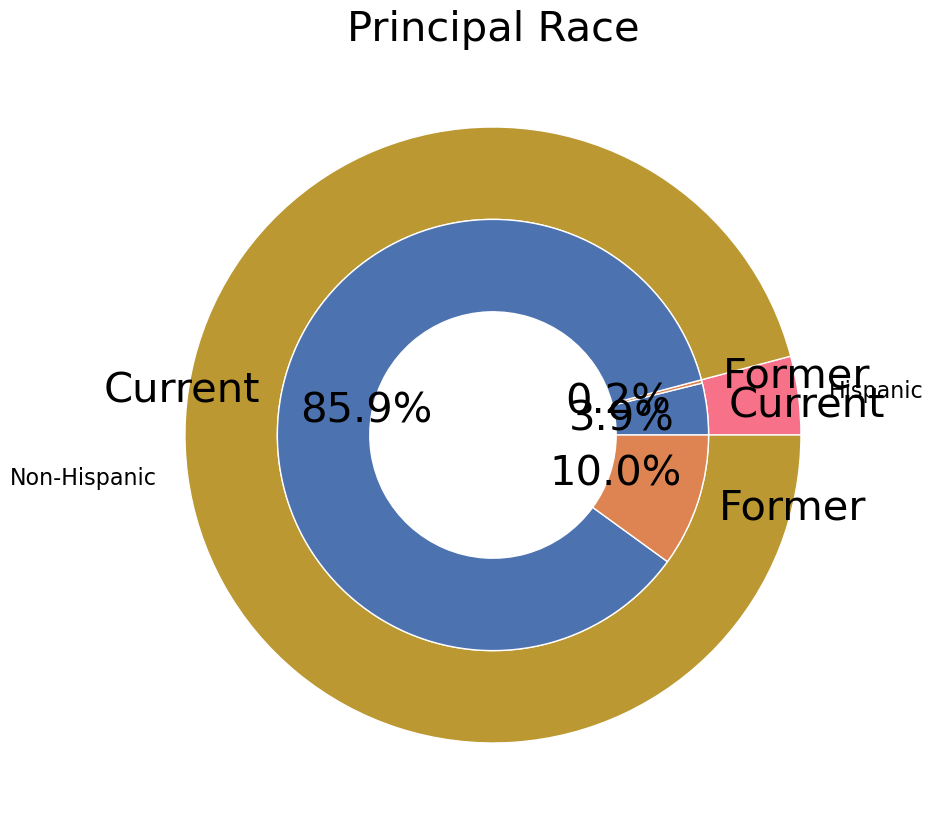

In [48]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Race', size=30)

plt.show()

In [49]:
col='gender_P_Female'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Female' if x==1 else 'Male')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (14): gender_P_Female


,gender_P_Female,NUM_T_Pred,label,total,ratio
0,Female,9285,Current,10076,92.149663
1,Female,791,Former,10076,7.850337
2,Male,20514,Current,23122,88.720699
3,Male,2608,Former,23122,11.279301


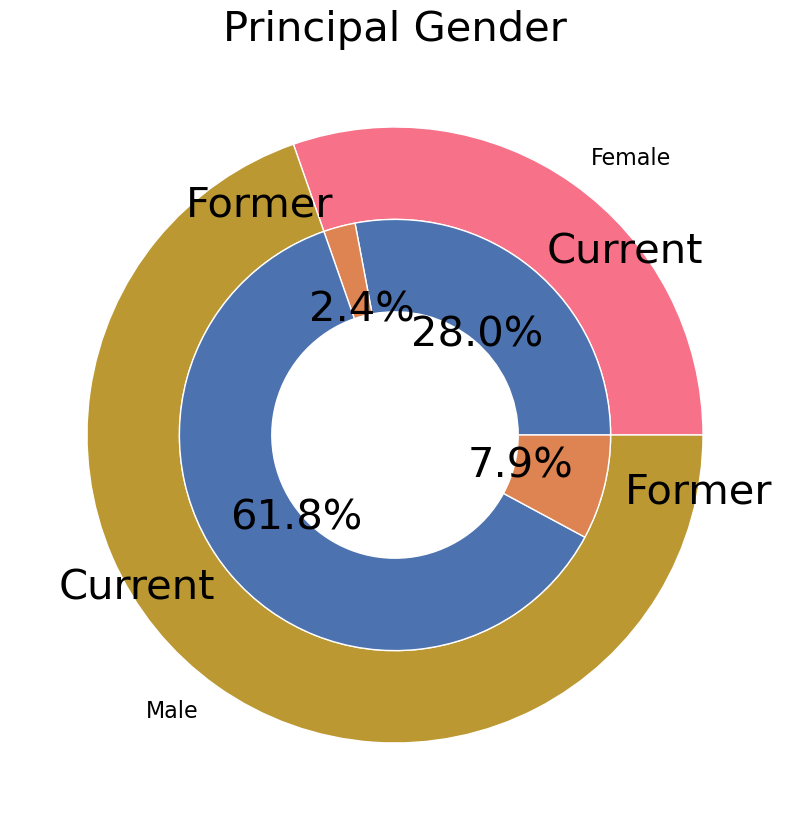

In [50]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Gender', size=30)

plt.show()